<a href="https://colab.research.google.com/github/kafu77/CNN_model/blob/main/CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Import important tools
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
#!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.0 MB/s eta 0:00:00


In [8]:
# Import the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import  Sequential
from tensorflow.keras.models import load_model

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping

import datetime,os

#models performance evaulation tools
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay


In [9]:
# Load the MNIST dataset
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [10]:
#There are a 60000 train images
X_train.shape

(60000, 28, 28)

In [12]:
X_train[0].shape

(28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

In [15]:
#checking if its normalize
X_train[0].min(),X_train[0].max()

(0, 255)

The dataset not normalized

In [21]:
# Reshape the images to 28x28x1 and normalize the pixel values
X_train=X_train.reshape(X_train.shape[0],28,28,1)/255.0
X_test=X_test.reshape(X_test.shape[0],28,28,1)/255.0

In [22]:
# Print the shapes of the training and test sets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


In [23]:
# Print the number of training and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


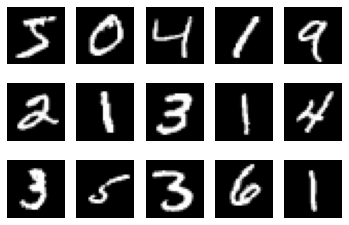

In [28]:
# Print the first 10 images in the training set
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off') 

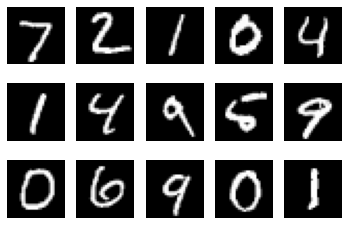

In [29]:
# Print the first 10 images in the testing set
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off') 

In [30]:
# Convert the labels to one-hot encoding
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [32]:
# Create a Sequential object, which is a linear stack of neural network layers.
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2),padding='same'))
model.add(Flatten())

# Add a dense layer to the model with 128 units and the ReLU activation function
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

#Last a softmax layer
model.add(Dense(10,activation='softmax'))


In [33]:
# Compile the model
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
#add ealystoping and Tensorboard
early_stop=EarlyStopping(monitor="val_loss",
                        min_delta=0,
                        patience=5,
                        verbose=0,
                        mode="min",
                        baseline=None,
                        restore_best_weights=False,
                        start_from_epoch=0)
from datetime import datetime
logdir = os.path.join("logs",datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir,
                                                      histogram_freq=1,
                                                      write_graph=True,
                                                      write_images=True,
                                                      update_freq='epoch',
                                                      profile_batch=2,
                                                      embeddings_freq=1)

In [38]:
# Train the model
model.fit(X_train,y_train,batch_size=32,epochs=10,verbose=1,callbacks=[early_stop,tensorboard_callback],validation_data=(X_test,y_test))


Epoch 1/10
1875/1875 [==============================] - 21s 5ms/step - loss: 0.2320 - accuracy: 0.9289 - val_loss: 0.0669 - val_accuracy: 0.9772
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0794 - accuracy: 0.9762 - val_loss: 0.0597 - val_accuracy: 0.9798
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0583 - accuracy: 0.9829 - val_loss: 0.0437 - val_accuracy: 0.9856
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0446 - accuracy: 0.9865 - val_loss: 0.0426 - val_accuracy: 0.9860
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 0.0425 - val_accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0456 - val_accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.0461 - val_accura

In [39]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0499 - accuracy: 0.9873
Test accuracy: 0.9872999787330627


In [42]:
model=load_model('cnn_mnist_model.h5')

In [43]:
# Save the model
model.save('cnn_mnist_model.h5')

In [46]:
# Predict the class of an image
img = image.load_img('/content/drive/MyDrive/Neural Network_23/test_image_2.png', target_size=(28, 28), color_mode='grayscale')

In [47]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0
prediction = model.predict(img)
print(prediction.argmax())

1/1 [==============================] - 0s 142ms/step
2
